**Chapter 4 – Training Linear Models**

Texts and code from A. Géron, Hands-on Machine Learning with Scikit Learn, Keras and TensorFlow, 3rd edition, O'Reilly, 2022.

# Introduction

So far we have treated machine learning models and their training algorithms mostly
like black boxes. If you went through some of the exercises in the previous chapters,
you may have been surprised by how much you can get done without knowing anything
about what’s under the hood: you optimized a regression system, you improved
a digit image classifier, and you even built a spam classifier from scratch, all without
knowing how they actually work. Indeed, in many situations you don’t really need to
know the implementation details.

However, having a good understanding of how things work can help you quickly home in on the appropriate model, the right training algorithm to use, and a good set of hyperparameters for your task. Understanding what’s under the hood will also help you debug issues and perform error analysis more efficiently.

In this chapter we will discuss linear regression in two different forms (closed-form equation and using gradient descent) and polynomial regression.

# Linear Regression

In Chapter 1 we looked at a simple regression model of life satisfaction:
$life_{satisfaction} = θ_0 + θ_1 \times GDP_{per capita}$

This model is just a linear function of the input feature `GDP_per_capita`. $θ_0$ and $θ_1$ are the model’s parameters.

More generally, a linear model makes a prediction by simply computing a weighted
sum of the input features, plus a constant called the bias term (also called the intercept
term),

<center> $\hat{y} = \theta _0 + \theta _1 x_1 + \theta _2 x_2 +...+ \theta _n x_n $ </center>

In this equation:

*   $\hat{y}$ is the predicted value.
*   $n$ is the number of features
*   $x_i$ is the $i^{th}$ feature value.
*   $\theta_j$ is the $j^{th}$ model parameter, including the bias term $\theta _0$ and the feature weights $\theta _1$, $\theta _2$,..., $\theta _n$



This can be written much more concisely using a vectorized form:
<center> $\hat{y} = h_{\boldsymbol{ \theta }} \left( \textbf{x} \right) = \boldsymbol{\theta} \cdot \textbf{x}$ </center>

In this equation:

*   $h_{\boldsymbol{ \theta }}$ is the hypothesis function, using the model parameters 
*   $\boldsymbol{\theta}$ is the the model's parameter vector, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$.
*   $\textbf{x}$ is the instance's feature vector, containing $x_0$ to $x_n$, with $x_0 = 1$.
*   $\boldsymbol{\theta} \cdot \textbf{x}$ is the dot product of the vectors $\boldsymbol{\theta}$ and $\textbf{x}$, which is equal to $\theta _0 x_0 + \theta _1 x_1 + \theta _2 x_2 +...+ \theta _n x_n $



Since vectors are often represented as *column vectors*, which are 2D arrays with a single column. If $\boldsymbol{\theta}$ and $\text{x}$ are column vectors, then the prediction can be writte as $\hat{y} = \boldsymbol{\theta}^T  \textbf{x}$, where $\boldsymbol{\theta}^T$ is the *transpose* of $\boldsymbol{\theta}$ (a row vector instead of a column) and $\boldsymbol{\theta}^T  \textbf{x}$ is a matix multiplication. It will all lead to the same prediction, except it is now represented as a single-cell mnatrix rather than a scalar value.

OK, that’s the linear regression model—but how do we train it? Well, recall that
training a model means setting its parameters so that the model best fits the training
set. For this purpose, we first need a measure of how well (or poorly) the model fits
the training data.

In Chapter 2 we saw that the most common performance measure
of a regression model is the root mean square error. Therefore, to
train a linear regression model, we need to find the value of $\boldsymbol{\theta}$ that minimizes the
RMSE. In practice, it is simpler to minimize the mean squared error (MSE) than the
RMSE, and it leads to the same result (because the value that minimizes a positive
function also minimizes its square root).

The MSE of a linear regression hypothesis hθ on a training set $\textbf{X}$ is calculated using
<center>$\mathrm{MSE \left( \textbf{X}, h_\theta \right)} = \frac{1}{m} \sum_{i=1}^{m} \left( \boldsymbol{\theta}^T  \textbf{x}^ \left( i \right) - y^\left(i\right)\right) ^2$</center>

# The Normal Equation

To find the value of $\boldsymbol{\theta}$ that minimizes the MSE, there exists a closed-form solution—in
other words, a mathematical equation that gives the result directly. This is called the
Normal equation.
<center>$\mathrm{\hat{\boldsymbol{\theta}} = \left( X^T X \right)^{-1}X^T y}$</center>

In this equation:


*   $\mathrm{\hat{\boldsymbol{\theta}}}$ is the value of $\boldsymbol{\theta}$ that minimizes the cost function.
*   $\textbf{y}$ is the vector of target values conatining $y^\left(1\right)$ to $y^\left(n\right)$.



Let’s generate some linear-looking data to test this equation

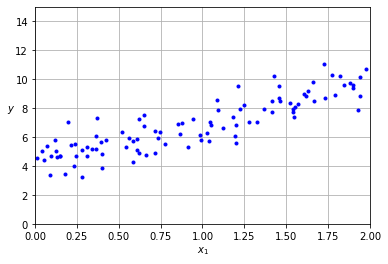

In [1]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

Now let’s compute  $\mathrm{\hat{\boldsymbol{\theta}}}$ is the value of $\boldsymbol{\theta}$ using the Normal equation. We will use the `inv()` function from
NumPy’s linear algebra module (`np.linalg`) to compute the inverse of a matrix, and
the `dot()` method for matrix multiplication:

In [2]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

The @ operator performs matrix multiplication. If A and B are
NumPy arrays, then A @ B is equivalent to np.`matmul(A, B)`. Many
other libraries, like TensorFlow, PyTorch, and JAX, support the @
operator as well. However, you cannot use @ on pure Python arrays
(i.e., lists of lists).

The function that we used to generate the data is $y = 4 + 3x_1 +$  Gaussian noise. Let’s see what the equation found:

In [3]:
theta_best

array([[4.21509616],
       [2.77011339]])

We would have hoped for $θ_0 = 4$ and $θ_1 = 3$ instead of $θ_0 = 4.215$ and $θ_1 = 2.77$.
Close enough, but the noise made it impossible to recover the exact parameters of the
original function. The smaller and noisier the dataset, the harder it gets.

Now we can make predictions using $\mathrm{\hat{\boldsymbol{\theta}}}$:

In [4]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

Let’s plot this model’s predictions

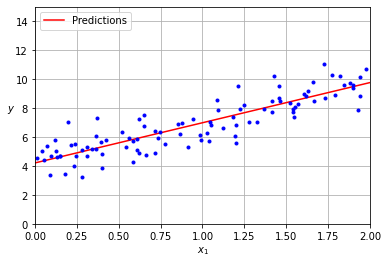

In [5]:
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

plt.show()

Performing linear regression using Scikit-Learn is relatively straightforward:

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [7]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

Notice that Scikit-Learn separates the bias term (`intercept_`) from the feature
weights (`coef_`).

# Gradient Descent

*Gradient descent* is a generic optimization algorithm capable of finding optimal solutions
to a wide range of problems. The general idea of gradient descent is to tweak
parameters iteratively in order to minimize a cost function.

Suppose you are lost in the mountains in a dense fog, and you can only feel the slope
of the ground below your feet. A good strategy to get to the bottom of the valley
quickly is to go downhill in the direction of the steepest slope.

This is exactly what
gradient descent does: it measures the local gradient of the error function with regard
to the parameter vector $\boldsymbol{\theta}$,and it goes in the direction of descending gradient. Once
the gradient is zero, you have reached a minimum!

In practice, you start by filling θ with random values (this is called random initialization).
Then you improve it gradually, taking one baby step at a time, each step
attempting to decrease the cost function (e.g., the MSE), until the algorithm converges
to a minimum.

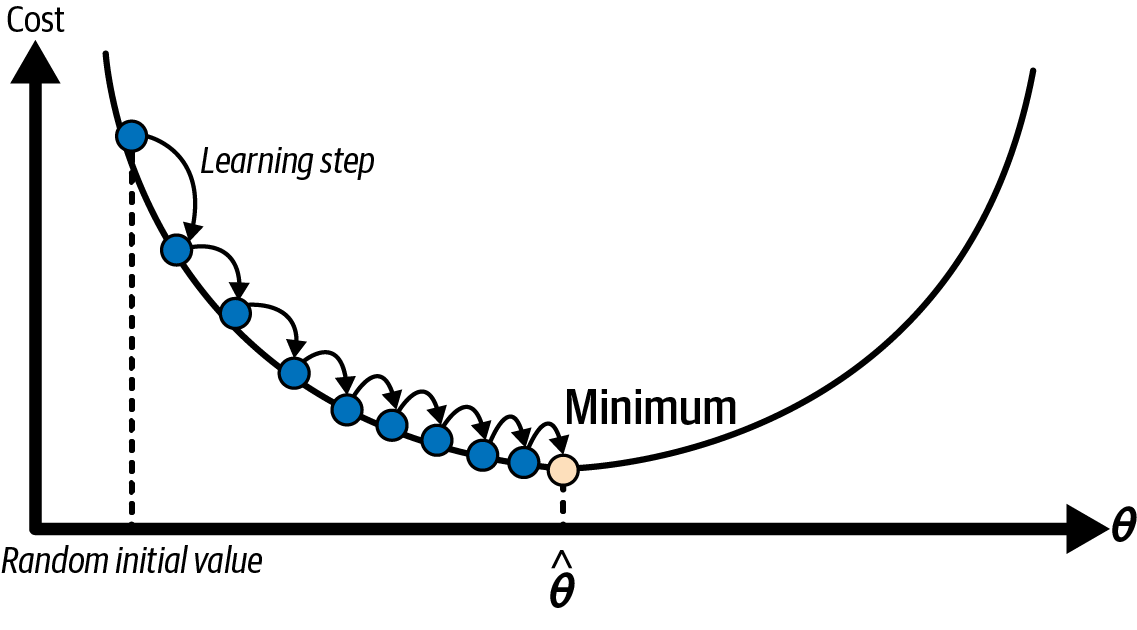

An important parameter in gradient descent is the size of the steps, determined by
the learning rate hyperparameter. If the learning rate is too small, then the algorithm
will have to go through many iterations to converge, which will take a long time.

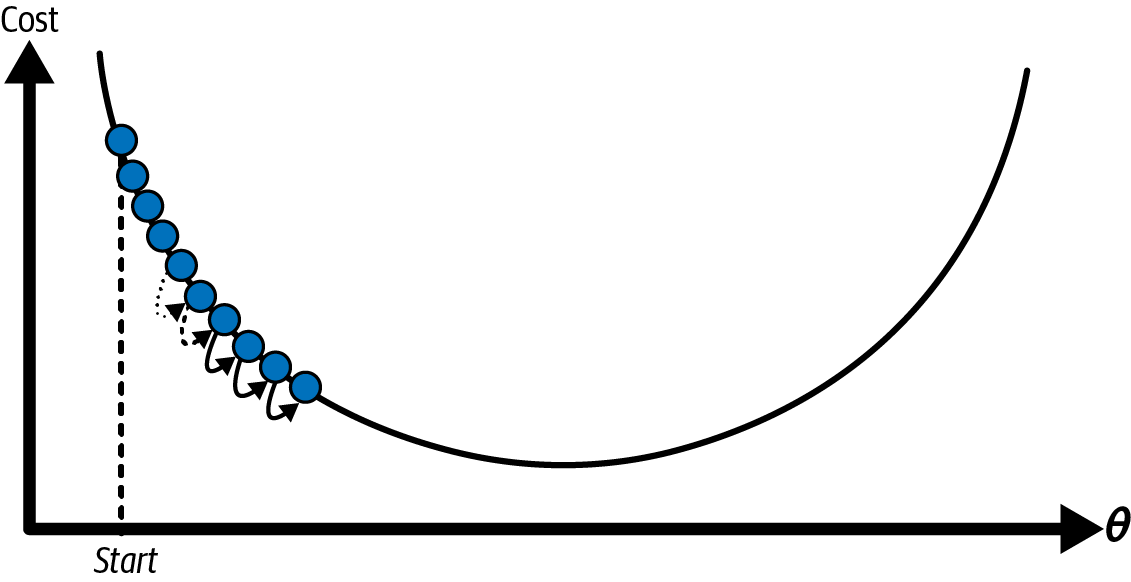

On the other hand, if the learning rate is too high, you might jump across the valley
and end up on the other side, possibly even higher up than you were before. This
might make the algorithm diverge, with larger and larger values, failing to find a good
solution.

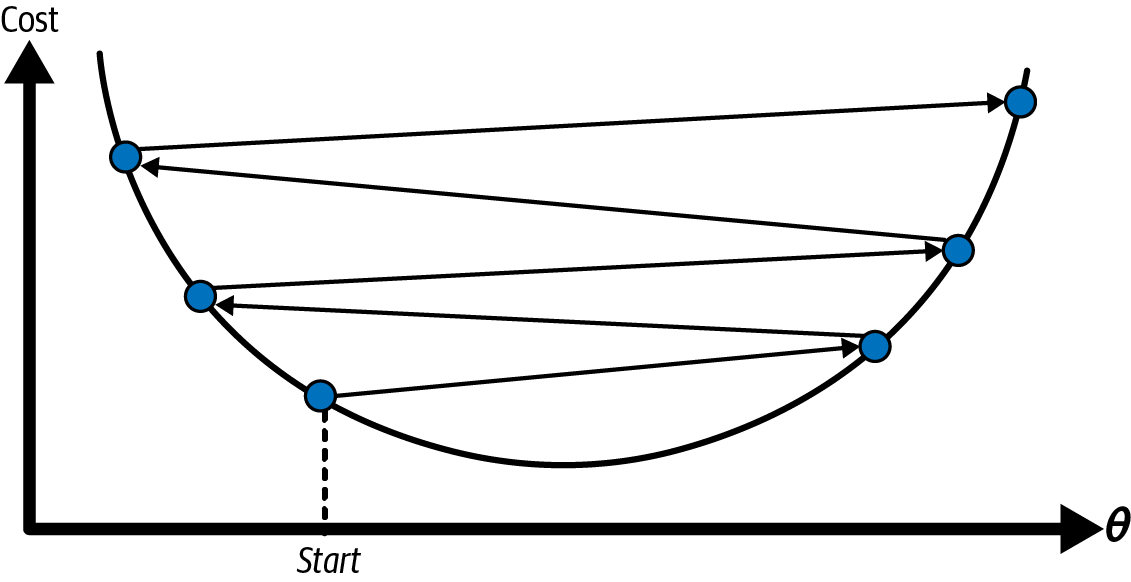

Additionally, not all cost functions look like nice, regular bowls. There may be
holes, ridges, plateaus, and all sorts of irregular terrain, making convergence to the
minimum difficult.

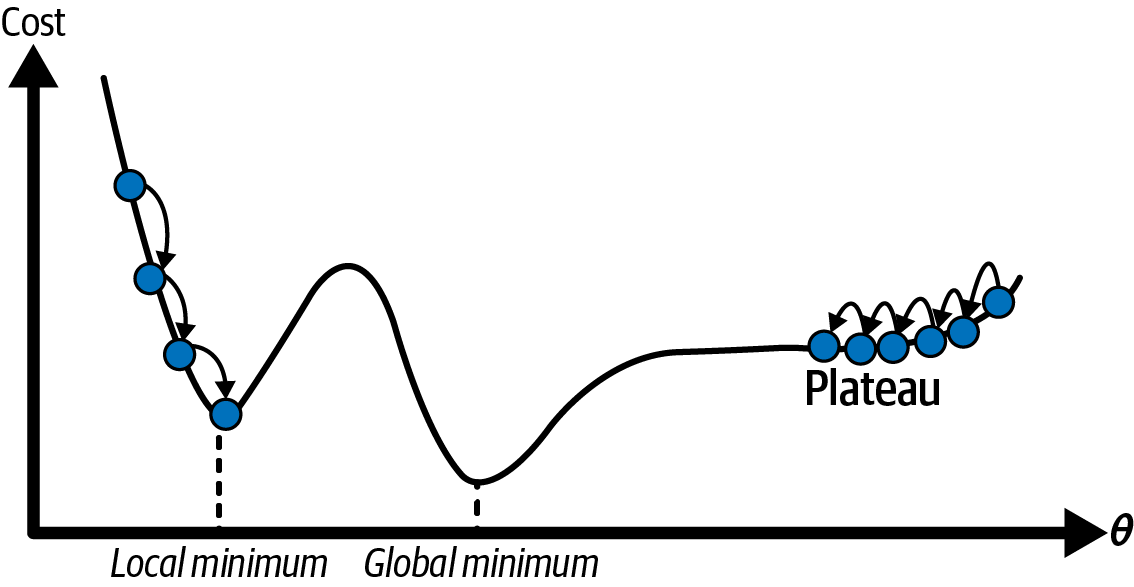

Fortunately, the MSE cost function for a linear regression model happens to be a
convex function, which means that if you pick any two points on the curve, the line
segment joining them is never below the curve. This implies that there are no local
minima, just one global minimum. It is also a continuous function with a slope that
never changes abruptly.2 These two facts have a great consequence: gradient descent
is guaranteed to approach arbitrarily closely the global minimum (if you wait long
enough and if the learning rate is not too high).

While the cost function has the shape of a bowl, it can be an elongated bowl if the
features have very different scales.

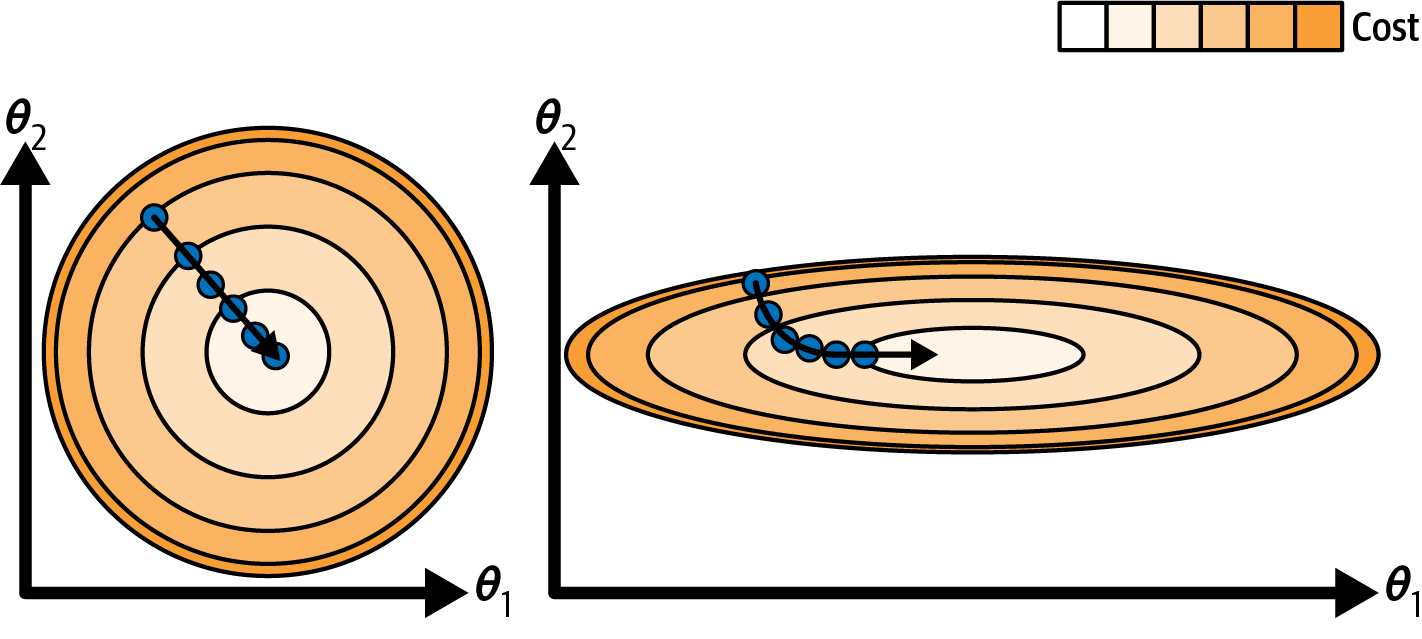

As you can see, on the left the gradient descent algorithm goes straight toward the
minimum, thereby reaching it quickly, whereas on the right it first goes in a direction
almost orthogonal to the direction of the global minimum, and it ends with a long
march down an almost flat valley. It will eventually reach the minimum, but it will
take a long time.

When using gradient descent, you should ensure that all features
have a similar scale (e.g., using Scikit-Learn’s `StandardScaler`
class), or else it will take much longer to converge.

# Batch Gradient Descent

To implement gradient descent, you need to compute the gradient of the cost function
with regard to each model parameter $\theta_j$. In other words, you need to calculate
how much the cost function will change if you change $\theta_j$ just a little bit. This is called
a partial derivative. It is like asking, “What is the slope of the mountain under my
feet if I face east”? and then asking the same question facing north (and so on for all
other dimensions, if you can imagine a universe with more than three dimensions).

This equation computes the partial derivative of the MSE with regard to parameter $\theta_j$ noted $\partial \mathrm{MSE \left( \boldsymbol{\theta}\right)} / \partial \theta_j$:

$\frac{\partial}{\partial \theta_j} \mathrm{MSE \left( \boldsymbol{\theta}\right)} = \frac{2}{m} \sum_{i=1}^{m} \left( \boldsymbol{\theta}^T  \textbf{x}^ \left( i \right) - y^\left(i\right)\right) x^{(i)}_j$

Instead of computing these partial derivatives individually, you can use the following equation to compute them all in one go.

$\nabla_\theta \text{MSE}\left( \boldsymbol{\theta} \right)=
\begin{bmatrix}
 \frac{\partial}{\partial \theta_0} \mathrm{MSE \left( \boldsymbol{\theta}\right)} \\
\frac{\partial}{\partial \theta_1} \mathrm{MSE \left( \boldsymbol{\theta}\right)} \\
\vdots
\frac{\partial}{\partial \theta_n} \mathrm{MSE \left( \boldsymbol{\theta}\right)} 
\end{bmatrix}
= \frac{2}{m}\textbf{X}{^T}\left( \textbf{X} \boldsymbol{\theta} - \textbf{y} \right)$

Notice that this formula involves calculations over the full training
set X, at each gradient descent step! This is why the algorithm is
called batch gradient descent: it uses the whole batch of training
data at every step (actually, full gradient descent would probably
be a better name). As a result, it is terribly slow on very large
training sets (we will look at some much faster gradient descent
algorithms shortly). However, gradient descent scales well with the
number of features; training a linear regression model when there
are hundreds of thousands of features is much faster using gradient
descent than using the Normal equation.

Once you have the gradient vector, which points uphill, just go in the opposite
direction to go downhill. This is where the
learning rate $\eta$ comes into play:4 multiply the gradient vector by $\eta$ to determine the
size of the downhill step
<center> $\boldsymbol{\theta}^{\left( \mathrm{next \, step}\right)} = \boldsymbol{\theta}-\eta \nabla_\theta \mathrm{MSE}\left( \boldsymbol{\theta} \right)$ </center>

Let’s look at a quick implementation of this algorithm:

In [8]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

That wasn’t too hard! Each iteration over the training set is called an *epoch*. Let’s look
at the resulting `theta`:

In [9]:
theta

array([[4.21509616],
       [2.77011339]])

Hey, that’s exactly what the Normal equation found! Gradient descent worked perfectly.
But what if you had used a different learning rate (eta)? The figure below shows
the first 20 steps of gradient descent using three different learning rates.

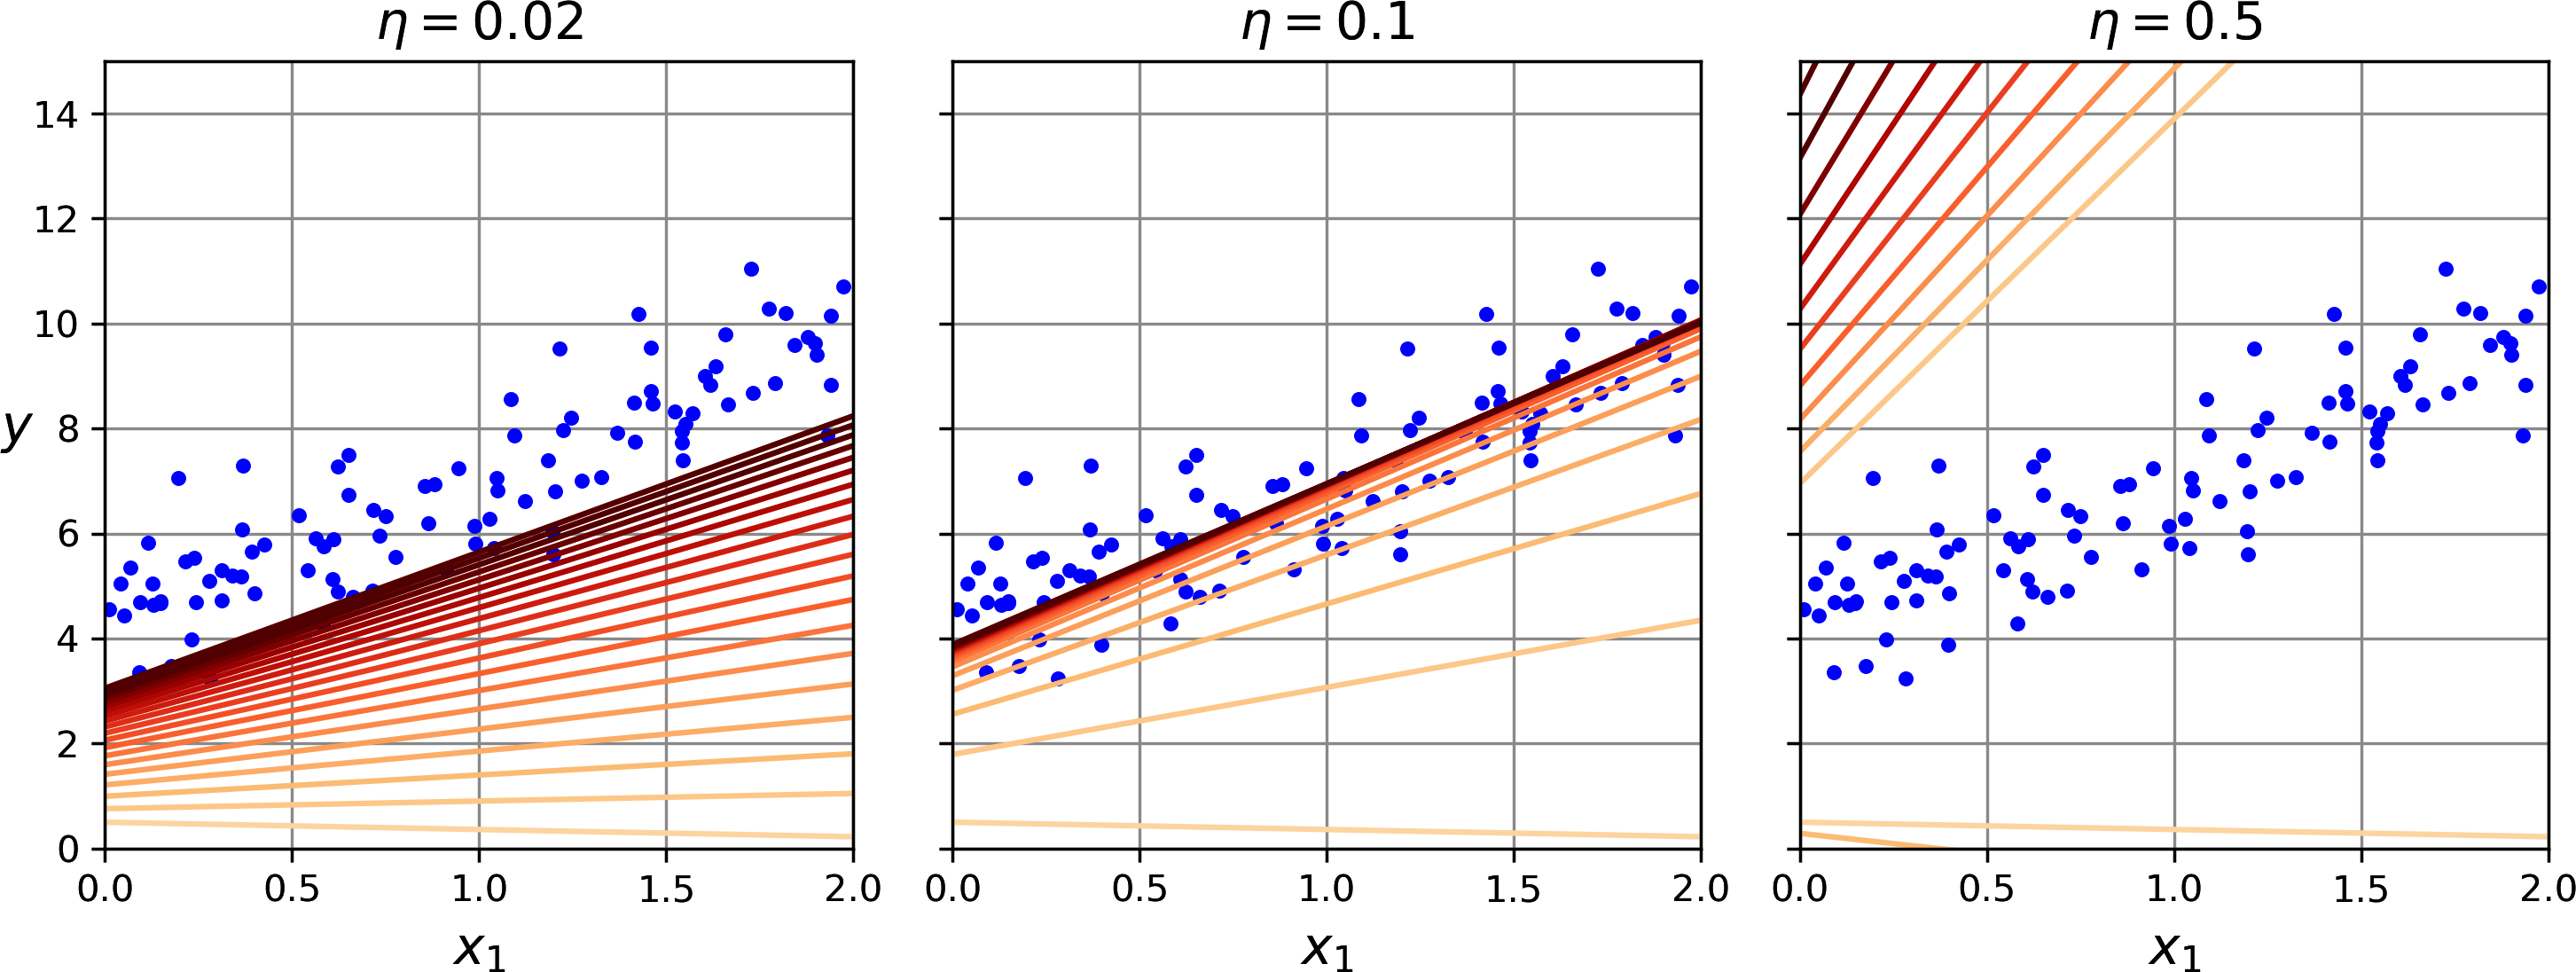

On the left, the learning rate is too low: the algorithm will eventually reach the
solution, but it will take a long time. In the middle, the learning rate looks pretty
good: in just a few epochs, it has already converged to the solution. On the right,
the learning rate is too high: the algorithm diverges, jumping all over the place and
actually getting further and further away from the solution at every step.

To find a good learning rate, you can use grid search (see Chapter 2). However, you
may want to limit the number of epochs so that grid search can eliminate models that
take too long to converge.

# Stochastic Gradient Descent

The main problem with batch gradient descent is the fact that it uses the whole
training set to compute the gradients at every step, which makes it very slow when
the training set is large.

At the opposite extreme, *stochastic gradient descent* picks a
random instance in the training set at every step and computes the gradients based
only on that single instance.

Obviously, working on a single instance at a time makes
the algorithm much faster because it has very little data to manipulate at every
iteration. It also makes it possible to train on huge training sets, since only one
instance needs to be in memory at each iteration

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is
much less regular than batch gradient descent: instead of gently decreasing until it
reaches the minimum, the cost function will bounce up and down, decreasing only
on average. Over time it will end up very close to the minimum, but once it gets there
it will continue to bounce around, never settling down (see figure below). Once the
algorithm stops, the final parameter values will be good, but not optimal.

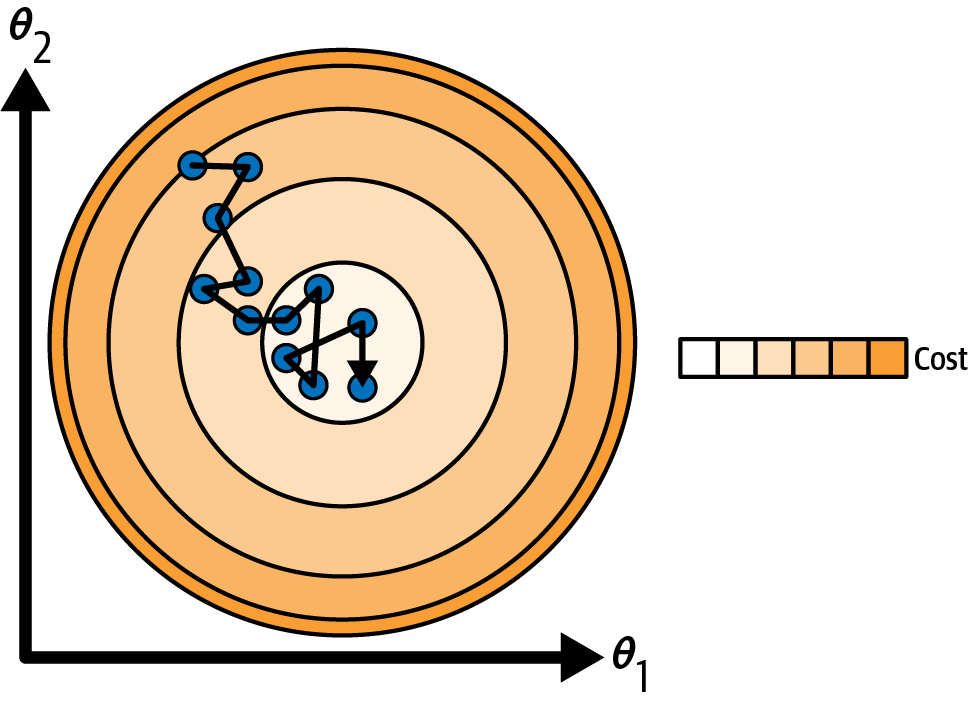

When the cost function is very irregular, this can actually help
the algorithm jump out of local minima, so stochastic gradient descent has a better
chance of finding the global minimum than batch gradient descent does.
Therefore, randomness is good to escape from local optima, but bad because it means
that the algorithm can never settle at the minimum.

One solution to this dilemma
is to gradually reduce the learning rate. The steps start out large (which helps make
quick progress and escape local minima), then get smaller and smaller, allowing
the algorithm to settle at the global minimum.

The function that determines the learning rate at each iteration is called the learning schedule. If the learning rate is reduced too
quickly, you may get stuck in a local minimum, or even end up frozen halfway to
the minimum. If the learning rate is reduced too slowly, you may jump around the
minimum for a long time and end up with a suboptimal solution if you halt training
too early.

This code implements stochastic gradient descent using a simple learning schedule:

In [10]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for iteration in range(m):
      random_index = np.random.randint(m)
      xi = X_b[random_index : random_index + 1]
      yi = y[random_index : random_index + 1]
      gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
      eta = learning_schedule(epoch * m + iteration)
      theta = theta - eta * gradients

By convention we iterate by rounds of *m* iterations; each round is called an epoch, as
earlier. While the batch gradient descent code iterated 1,000 times through the whole
training set, this code goes through the training set only 50 times and reaches a pretty
good solution:

In [11]:
theta

array([[4.21076011],
       [2.74856079]])

When using stochastic gradient descent, the training instances
must be independent and identically distributed (IID) to ensure
that the parameters get pulled toward the global optimum, on
average. A simple way to ensure this is to shuffle the instances
during training (e.g., pick each instance randomly, or shuffle the
training set at the beginning of each epoch). If you do not shuffle
the instances—for example, if the instances are sorted by label—
then SGD will start by optimizing for one label, then the next, and
so on, and it will not settle close to the global minimum.

To perform linear regression using stochastic GD with Scikit-Learn, you can use
the `SGDRegressor` class, which defaults to optimizing the MSE cost function. The
following code runs for maximum 1,000 epochs (`max_iter`) or until the loss drops by
less than 10–5 (`tol`) during 100 epochs (`n_iter_no_change`). It starts with a learning
rate of 0.01 (`eta0`), using the default learning schedule (different from the one we
used). Lastly, it does not use any regularization (`penalty=None`; more details on this
shortly):

In [12]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

Once again, you find a solution quite close to the one returned by the Normal
equation:

In [13]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

# Mini-Batch Gradient Descent

The last gradient descent algorithm we will look at is called *mini-batch gradient descent*. This method computes the gradients on small random sets of instances called *mini-batches*. The main
advantage of mini-batch GD over stochastic GD is that you can get a performance
boost from hardware optimization of matrix operations, especially when using GPUs.

The algorithm’s progress in parameter space is less erratic than with stochastic GD,
especially with fairly large mini-batches. As a result, mini-batch GD will end up
walking around a bit closer to the minimum than stochastic GD—but it may be
harder for it to escape from local minima (in the case of problems that suffer from
local minima, unlike linear regression with the MSE cost function).

The following table compares the algorithms we’ve discussed so far for linear regression (recall
that m is the number of training instances and n is the number of features).

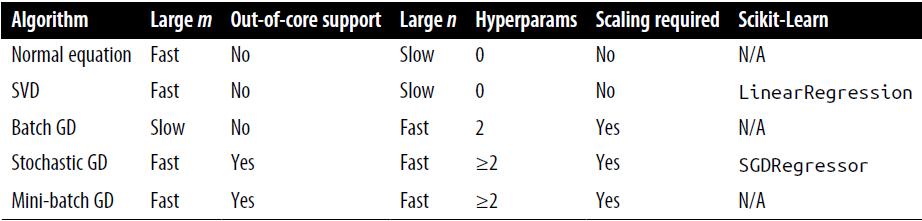

# Homework

**Exercises 1, 2, 4, 5, 6, 7 from Chapter 4 in the texbook.**